In [1]:
!pip install -q GOES
!pip install -q cartopy

In [2]:
import GOES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

In [3]:
GOES.show_products_from_google_cloud('goes16')

Products of goes16 available in Google Cloud:
  ABI-L1b-RadC
  ABI-L1b-RadF
  ABI-L1b-RadM
  ABI-L2-ACHA2KMC
  ABI-L2-ACHA2KMF
  ABI-L2-ACHA2KMM
  ABI-L2-ACHAC
  ABI-L2-ACHAF
  ABI-L2-ACHAM
  ABI-L2-ACHP2KMC
  ABI-L2-ACHP2KMF
  ABI-L2-ACHP2KMM
  ABI-L2-ACHTF
  ABI-L2-ACHTM
  ABI-L2-ACMC
  ABI-L2-ACMF
  ABI-L2-ACMM
  ABI-L2-ACTPC
  ABI-L2-ACTPF
  ABI-L2-ACTPM
  ABI-L2-ADPC
  ABI-L2-ADPF
  ABI-L2-ADPM
  ABI-L2-AICEF
  ABI-L2-AITAF
  ABI-L2-AODC
  ABI-L2-AODF
  ABI-L2-BRFC
  ABI-L2-BRFF
  ABI-L2-BRFM
  ABI-L2-CCLC
  ABI-L2-CCLF
  ABI-L2-CCLM
  ABI-L2-CMIPC
  ABI-L2-CMIPF
  ABI-L2-CMIPM
  ABI-L2-COD2KMF
  ABI-L2-CODC
  ABI-L2-CODF
  ABI-L2-CPSC
  ABI-L2-CPSF
  ABI-L2-CPSM
  ABI-L2-CTPC
  ABI-L2-CTPF
  ABI-L2-DMWC
  ABI-L2-DMWF
  ABI-L2-DMWM
  ABI-L2-DMWVC
  ABI-L2-DMWVF
  ABI-L2-DMWVM
  ABI-L2-DSIC
  ABI-L2-DSIF
  ABI-L2-DSIM
  ABI-L2-DSRC
  ABI-L2-DSRF
  ABI-L2-DSRM
  ABI-L2-FDCC
  ABI-L2-FDCF
  ABI-L2-FDCM
  ABI-L2-FSCC
  ABI-L2-FSCF
  ABI-L2-FSCM
  ABI-L2-LSAC
  ABI-L2-LSAF
  ABI-L2-LSA

In [4]:
flist = GOES.get_data_to_colab('goes16', 'ABI-L2-CMIPF', DateTimeIni='20200320-203000', DateTimeFin='20200320-210100', channel=['13'])  #, path_out='/content/test/')

OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc 27.0MB
OR_ABI-L2-CMIPF-M6C13_G16_s20200802040177_e20200802049497_c20200802049583.nc 27.0MB
OR_ABI-L2-CMIPF-M6C13_G16_s20200802050177_e20200802059497_c20200802059576.nc 27.0MB
OR_ABI-L2-CMIPF-M6C13_G16_s20200802100177_e20200802109497_c20200802109572.nc 27.0MB


In [5]:
print(flist)

['/content/OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc', '/content/OR_ABI-L2-CMIPF-M6C13_G16_s20200802040177_e20200802049497_c20200802049583.nc', '/content/OR_ABI-L2-CMIPF-M6C13_G16_s20200802050177_e20200802059497_c20200802059576.nc', '/content/OR_ABI-L2-CMIPF-M6C13_G16_s20200802100177_e20200802109497_c20200802109572.nc']


In [6]:
# set the map domain
domain = [-90.0,-60.0,-20.0,2.0]

# reads the file
ds = GOES.open_dataset(flist[0])

# get image with the coordinates of corners of their pixels
CMI, LonCor, LatCor = ds.image('CMI', lonlat='corner', domain=domain)

# get information about data
sat = ds.attribute('platform_ID')
band = ds.variable('band_id').data[0]

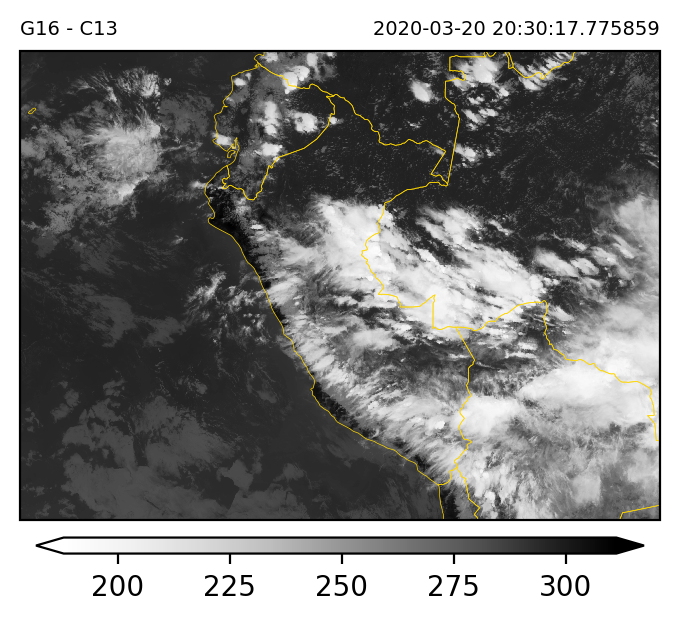

In [7]:
# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
#ax.outline_patch.set_linewidth(0.3)

# add the geographic boundaries
l = NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(l, edgecolor='gold', linewidth=0.25)

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=plt.cm.Greys, transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, orientation='horizontal', extend='both', cax=fig.add_axes([0.12, 0.2, 0.76, 0.02]))

# set the title
ax.set_title('{} - C{}'.format(sat, band), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0], fontsize=7, loc='right')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())

plt.show()